In [68]:
import GEOparse
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [59]:
gse = GEOparse.get_GEO(geo="GSE22552")


12-Apr-2022 07:20:06 DEBUG utils - Directory ./ already exists. Skipping.
12-Apr-2022 07:20:06 INFO GEOparse - File already exist: using local version.
12-Apr-2022 07:20:06 INFO GEOparse - Parsing ./GSE22552_family.soft.gz: 
12-Apr-2022 07:20:06 DEBUG GEOparse - DATABASE: GeoMiame
12-Apr-2022 07:20:06 DEBUG GEOparse - SERIES: GSE22552
12-Apr-2022 07:20:06 DEBUG GEOparse - PLATFORM: GPL570
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/GEOparse/GEOparse.py:401: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  return read_csv(StringIO(data), index_col=None, sep="\t")
12-Apr-2022 07:20:06 DEBUG GEOparse - SAMPLE: GSM559689
12-Apr-2022 07:20:06 DEBUG GEOparse - SAMPLE: GSM559690
12-Apr-2022 07:20:06 DEBUG GEOparse - SAMPLE: GSM559691
12-Apr-2022 07:20:07 DEBUG GEOparse - SAMPLE: GSM559692
12-Apr-2022 07:20:07 DEBUG GEOparse - SAMPLE: GSM559693
12-Apr-2022 07:20:07 DEBUG GEOparse - SAMPLE: GSM559694
12-Apr

In [60]:
dataframes = []
for key, val in gse.gsms.items():
  table = val.table.set_index("ID_REF").rename(columns={"VALUE": key})
  dataframes.append(table)
  
data = pd.concat(dataframes, axis=1)

genes_comprehensible_data = gse.gpls["GPL570"].table.rename(columns={"ID": "ID_REF"}).set_index('ID_REF').loc[: , ('Gene Symbol', 'ENTREZ_GENE_ID')]

merged_dataframes = pd.merge(left=genes_comprehensible_data, right=data, left_index=True, right_index=True)

def remove_trailing_slashes(col):
  arr = np.array(col)
  return [str(gene).split('/')[0] for gene in arr]
  
refined_gpl = genes_comprehensible_data[['Gene Symbol', 'ENTREZ_GENE_ID']].apply(remove_trailing_slashes)

refined_merged_dataframe = pd.merge(left=refined_gpl, right=data, left_index=True, right_index=True).reset_index().set_index(['ID_REF','Gene Symbol', 'ENTREZ_GENE_ID'])

In [86]:
# Task 1:
phenotypes = gse.phenotype_data
removed_data_sets = list(phenotypes[phenotypes['title'].str.contains('Uns_')].index.values)
dataset_pre_processed = refined_merged_dataframe.drop(removed_data_sets, axis=1)
dataset_pre_processed

,,,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
ID_REF,Gene Symbol,ENTREZ_GENE_ID,,,,,,,,,,,,
1007_s_at,DDR1,780,4.946777,4.728418,4.738051,4.762729,4.549447,4.835533,4.709747,4.715527,5.049346,5.631210,5.379607,5.397816
1053_at,RFC2,5982,8.207308,8.695805,8.383330,8.049325,8.751171,8.381886,7.992828,7.998183,7.401185,5.444929,5.151547,5.207811
117_at,HSPA6,3310,6.311369,5.249919,5.953954,5.532214,5.746198,6.212243,6.870430,7.032106,7.295045,7.667298,7.784505,8.278446
121_at,PAX8,7849,7.159099,7.062484,7.329124,7.294014,7.006325,7.283475,7.156998,7.201767,7.397696,7.543862,7.869274,7.897521
1255_g_at,GUCA1A,2978,3.821799,3.603829,3.691750,3.791226,3.654054,3.681459,4.896534,4.008463,4.508532,4.946233,3.765626,4.096830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AFFX-ThrX-5_at,nan,nan,5.624310,5.326154,5.588887,4.996499,5.471355,5.893110,5.743403,5.517842,6.319863,6.153024,6.339153,6.779153
AFFX-ThrX-M_at,nan,nan,6.589780,7.078883,7.219033,6.143109,6.954125,7.585613,7.354877,7.337199,8.222956,7.808429,8.113187,8.420713
AFFX-TrpnX-3_at,nan,nan,3.267483,3.231707,3.019570,3.382046,3.186596,3.207259,3.246196,3.197220,3.210587,3.385809,3.295025,3.326088


In [87]:
# task 2:
dataset_pre_processed.describe()

,GSM559689,GSM559690,GSM559691,GSM559692,GSM559693,GSM559694,GSM559695,GSM559696,GSM559697,GSM559698,GSM559699,GSM559700
count,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000,54675.000000
mean,5.631351,5.645538,5.647177,5.643353,5.650497,5.646240,5.647751,5.648663,5.642804,5.641746,5.632729,5.627669
std,2.008718,2.151832,2.135346,2.050417,2.132387,2.122161,2.103597,2.102086,2.093149,1.956583,1.967552,1.983168
min,2.552829,2.592396,2.557528,2.570300,2.590768,2.624404,2.589117,2.613913,2.625990,2.648773,2.624857,2.552459
25%,4.068560,3.935353,3.958457,4.037548,3.958517,3.972916,3.986983,3.989839,4.001895,4.130462,4.149201,4.119190
50%,5.234648,5.099071,5.140122,5.176868,5.138922,5.147776,5.166742,5.164457,5.171306,5.283507,5.255295,5.253193
75%,6.701256,6.920745,6.851461,6.774580,6.859045,6.843637,6.819665,6.812792,6.800105,6.644484,6.557022,6.596745
max,14.290997,14.424771,14.416912,14.270190,14.423644,14.405221,14.518687,14.520131,14.548121,14.698327,14.614120,14.627485


In [88]:
# task 3:
dataset_pre_processed.isna().sum()

GSM559689    0
GSM559690    0
GSM559691    0
GSM559692    0
GSM559693    0
GSM559694    0
GSM559695    0
GSM559696    0
GSM559697    0
GSM559698    0
GSM559699    0
GSM559700    0
dtype: int64

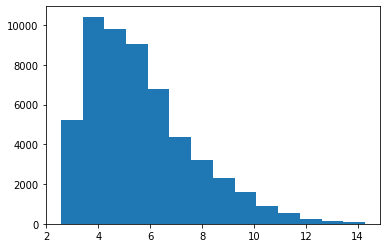

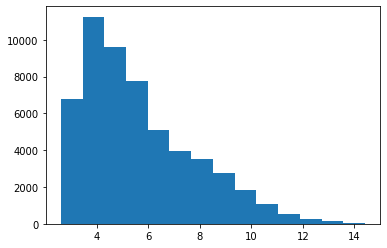

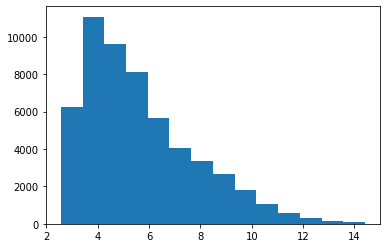

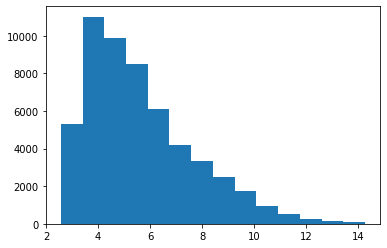

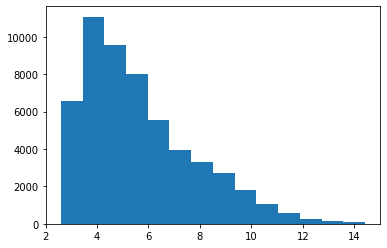

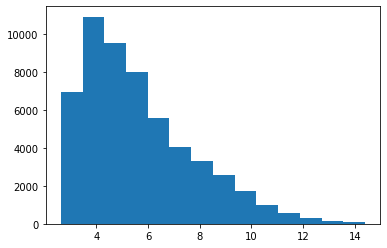

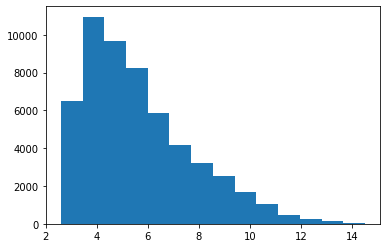

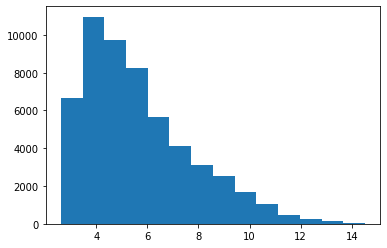

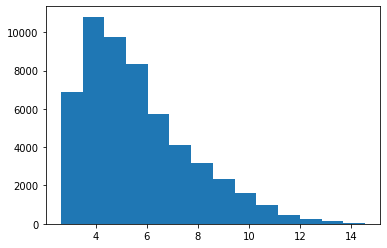

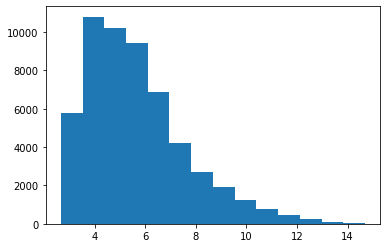

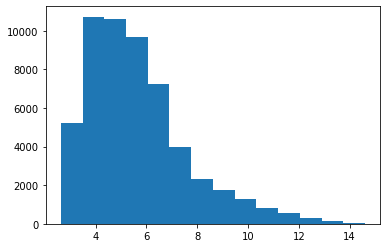

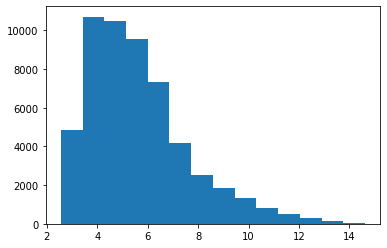

In [118]:
# task 4:
for col in dataset_pre_processed.columns:
  plt.hist(x = dataset_pre_processed[col], bins = 14)
  plt.xlabel('')
  plt.show()